In [1]:
# Import libraries and classes required for this example:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd 


In [2]:
df = pd.read_csv("/Users/davidjeannette/Desktop/Alex_Project/notebooks/out2.csv")
df.head()

,Unnamed: 0,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,Mag_X,Mag_Y,Mag_Z,y
0,0,15,-174,-90,-53,-568,-306,48,-675,-254,0
1,1,1,-176,-81,-84,-613,-271,-2,-668,-221,0
2,2,-10,-180,-77,-104,-647,-227,-34,-697,-175,0
3,3,-21,-191,-63,-128,-675,-191,-74,-741,-133,0
4,4,-37,-225,-59,-146,-700,-159,-110,-840,-103,0


In [3]:
df = df.drop('Unnamed: 0',axis=1)

In [4]:
y = df['y'].values
X = df.drop(['y'],axis=1).values

## 1. Diviser le dataset en jeu d'entrainement et de test

In [5]:
# Split dataset into random train and test subsets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

## 2. Standadisation des données

In [6]:
from sklearn.preprocessing import StandardScaler

# Standardize features by removing mean and scaling to unit variance:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [7]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

In [41]:
# Use the KNN classifier to fit data:
classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=4)

In [ ]:
# Predict y data with classifier: 
y_predict = classifier.predict(X_test)

In [39]:
# Print results: 

pd.DataFrame(confusion_matrix(y_test, y_predict))


,0,1
0,2019613,74622
1,92351,984299


In [40]:
target_names = ['Fall', 'Daily']
print(classification_report(y_test, y_predict,target_names=target_names) )

              precision    recall  f1-score   support

        Fall       0.96      0.96      0.96   2094235
       Daily       0.93      0.91      0.92   1076650

    accuracy                           0.95   3170885
   macro avg       0.94      0.94      0.94   3170885
weighted avg       0.95      0.95      0.95   3170885



In [11]:
# We create two lists to keep training and test accuracies. 
training_accuracy = []
test_accuracy = []

# We define a range of 1 to  (included) neighbors that will be tested
neighbors_settings = range(2,11)


for n_neighbors in neighbors_settings:
    
    print("n_neighbors",n_neighbors)
    
    # creating the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # fitting the model
    knn.fit(X_train, y_train)
    
    #recording the accuracy of the training set
    training_accuracy.append(knn.score(X_train, y_train))
    
    #recording the accuracy of the test set
    test_accuracy.append(knn.score(X_test, y_test))

n_neighbors 3
n_neighbors 4
n_neighbors 5
n_neighbors 6
n_neighbors 7
n_neighbors 8
n_neighbors 9
n_neighbors 10


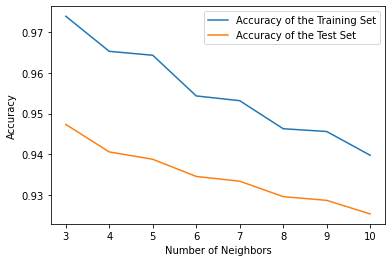

In [12]:
import matplotlib.pyplot as plt

neighbors_settings = range(3,11)
plt.plot(neighbors_settings, training_accuracy, label='Accuracy of the Training Set')
plt.plot(neighbors_settings, test_accuracy, label='Accuracy of the Test Set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()